In [1]:
from IPython.display import display, HTML

display(HTML('<h1 style="text-align: center; font-weight: bold;">MBTI Personality Types</h1>'))

<center>
  <img src="https://sxk5877.uta.cloud/wp-content/uploads/2023/02/shutterstock_2070009056.jpg" alt="image"/>
</center>

##  Import Required Libraries


In [2]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import classification_report, f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from nltk.corpus import stopwords
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.offline as pyo
from sklearn import metrics
from tqdm import tqdm
import seaborn as sns
import pandas as pd
import numpy as np
import spacy
import re
import nltk


ModuleNotFoundError: No module named 'spacy'

## Read Data From Csv File


In [3]:
df = pd.read_csv('MBTI 500.csv')

## Show First Few Rows Of Data


In [4]:
df.head()

,posts,type
0,computer thing another room believe yup talk o...,INTJ
1,warrant talk talk sub generally intjs talk lot...,INTJ
2,work network lot awesome people people give fl...,INTJ
3,first iq completely relative scale iq define a...,INTJ
4,delay week two test suck test horoscope like s...,INTJ


## provide a concise summary of Data


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58115 entries, 0 to 58114
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   posts   58115 non-null  object
 1   type    58115 non-null  object
dtypes: object(2)
memory usage: 908.2+ KB


## Provide A statistical Informations About Columns


In [6]:
df.describe()

,posts,type
count,58115,58115
unique,58115,16
top,feel like men good problem tell parent want te...,INFJ
freq,1,9825


## Show First Post  From  Dataset


In [7]:
df['posts'][0]

'computer thing another room believe yup talk occasionally apparently flirt concentrate work school think much blatantly say wear stupid human suit learn chinese japanese love grammar write think korean favourite sound beautiful would happy muslim country similar number intp first time test anywhere non intj j usually weak maybe try one day factory work kinda like easy listen music podcast plus pay well understand mean work full time rest life factory handle part time job go school great well must strike dark soul server lose since really want play co op hear make great computer programers website awesome like website wish conclusion relationship mine trust would hate anyone would good fix improve rather quit option even though struggle child divorce wonder many screw people know parent stay together think loveless marriage good kid two separate parent get along friend mutually support child effectively apart know also want child among reason look like alone view r theredpill learn qua

## Show Unique Values Of Personality Type


In [8]:
df['type'].unique()

array(['INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP', 'ENFJ', 'ENFP',
       'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP'],
      dtype=object)

## Show Number Of Unique Values Of Personality Type


In [9]:
print(f"Total of {len(df['type'].unique())} types of classified MBTI posts")

Total of 16 types of classified MBTI posts


## Check  Null Values In Dataset


In [10]:
df.isnull().sum()


,0
posts,0
type,0


## Word Frequency Analysis of MBTI Posts Dataset


In [11]:
Words = list()
for i in list(df['posts']):
    for j in i.split(' '):
        Words.append(j)
from collections import Counter
Words_dic = Counter(Words)
Words_dic = pd.DataFrame({'Word':list(Words_dic.keys()),'Frequency':list(Words_dic.values())})
Words_dic.sort_values('Frequency',ascending=False,inplace=True)
Words_dic.set_index('Word',inplace=True)
print(len(Words_dic))
Words_dic.head()

192394


,Frequency
Word,
like,388281
think,331815
people,300712
get,293938
make,219806


## Distribution of MBTI Posts Across Personality Types


In [26]:
df_bar_chart = df.groupby('type').count()
df_bar_chart_sorted = df_bar_chart.sort_values(by='posts', ascending=True)

trace1 = go.Bar(
    x=df_bar_chart_sorted['posts'],
    y=df_bar_chart_sorted.index,
    text=df_bar_chart_sorted['posts'],
    textposition='auto',
    orientation='h'
)

layout = go.Layout(
    title='Number Of Classified Posts per Type',
    xaxis_title='Frequency',
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)'
)

fig = go.Figure(data=[trace1], layout=layout)
fig.show()


## Word Cloud of Frequent Words in MBTI Posts Dataset


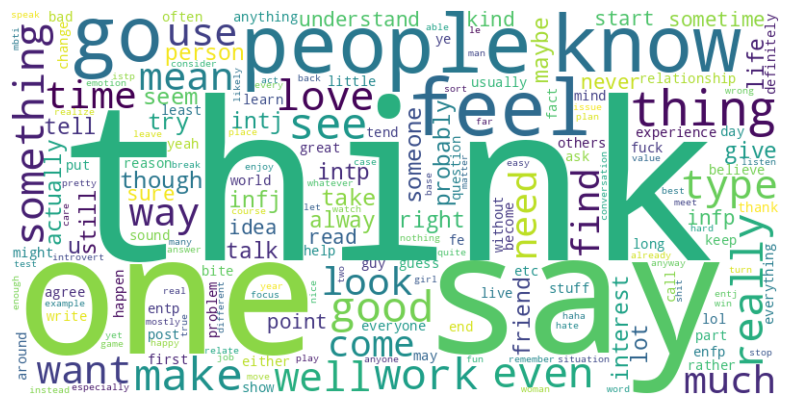

In [13]:
import nltk
from nltk.corpus import stopwords
import spacy
df = pd.read_csv('MBTI 500.csv')
df2 = df.sample(n=5000)

text = ' '.join(df2['posts'])

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Optimized Text Preprocessing and Lemmatization

In [14]:

nltk.download('stopwords')

nlp = spacy.load("en_core_web_sm")

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

cleaned_posts = [clean_text(text) for text in df['posts']]

def lemmatize_texts(texts):
    lemmatized_texts = []
    for doc in tqdm(nlp.pipe(texts, batch_size=50, n_process=-1), total=len(texts)):
        lemmatized_text = " ".join([token.lemma_ for token in doc if token.text not in stop_words and not token.is_punct])
        lemmatized_texts.append(lemmatized_text)
    return lemmatized_texts

df['posts'] = lemmatize_texts(cleaned_posts)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
100%|██████████| 58115/58115 [53:02<00:00, 18.26it/s]


## Train-Test Split for Text Classification

In [15]:
X = df['posts']
y = df['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Creation and Serialization for Text Classification

In [17]:
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train)

clf = LinearSVC()
clf.fit(X_train_tfidf, y_train)

text_clf = Pipeline([('tfidf',TfidfVectorizer()),('clf',LinearSVC())])
text_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

## Generating Predictions on Test Data

In [18]:
predictions = text_clf.predict(X_test)

## Evaluation of Model Performance using Classification Report

In [19]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        ENFJ       0.83      0.74      0.78       243
        ENFP       0.84      0.82      0.83      1083
        ENTJ       0.90      0.80      0.85       537
        ENTP       0.81      0.78      0.79      1123
        ESFJ       0.85      0.64      0.73        36
        ESFP       0.82      0.50      0.62        74
        ESTJ       0.95      0.75      0.84        93
        ESTP       0.92      0.92      0.92       329
        INFJ       0.82      0.84      0.83      1965
        INFP       0.78      0.81      0.80      1454
        INTJ       0.78      0.82      0.80      1649
        INTP       0.79      0.84      0.81      1777
        ISFJ       0.75      0.63      0.68       121
        ISFP       0.77      0.65      0.70       181
        ISTJ       0.85      0.74      0.79       254
        ISTP       0.89      0.86      0.87       704

    accuracy                           0.81     11623
   macro avg       0.83   

## Calculating and Displaying Model Accuracy

In [20]:
print(f"Overall accuracy of the model: {round(metrics.accuracy_score(y_test, predictions),2)}")

Overall accuracy of the model: 0.81


## Visualization of Confusion Matrix for Model Performance

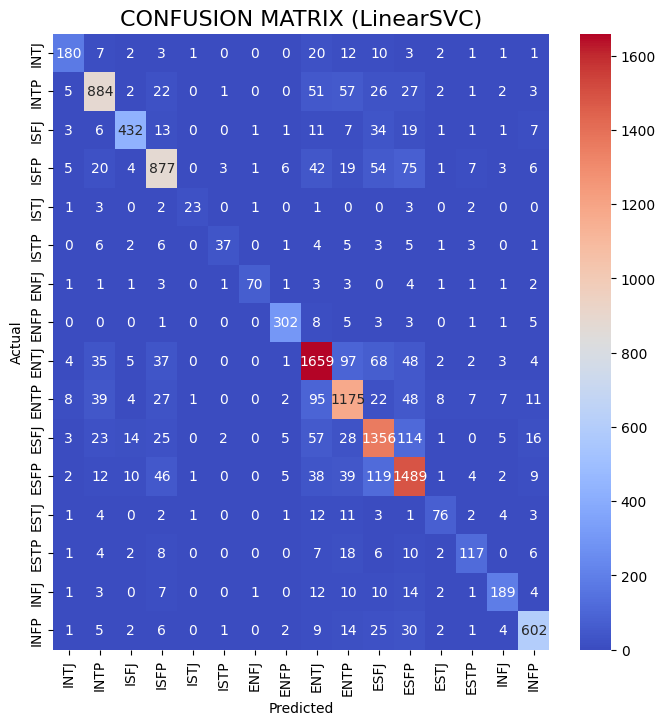

In [21]:
conf_mat = confusion_matrix(y_test, predictions)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm", fmt='d',
            xticklabels=df["type"].unique(),
            yticklabels=df["type"].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX (LinearSVC)", size=16);

## Text Classification Using Logistic Regression with Accuracy and Performance Report

In [22]:
log_reg = LogisticRegression()
log_reg.fit(X_train_tfidf, y_train)
text_clf = Pipeline([('tfidf',TfidfVectorizer()),('clf',LogisticRegression())])
text_clf.fit(X_train, y_train)

y_pred = text_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy: 0.8109782328142476
Classification Report:
               precision    recall  f1-score   support

        ENFJ       0.88      0.61      0.72       243
        ENFP       0.85      0.81      0.83      1083
        ENTJ       0.94      0.76      0.84       537
        ENTP       0.82      0.78      0.80      1123
        ESFJ       0.77      0.28      0.41        36
        ESFP       0.88      0.41      0.56        74
        ESTJ       1.00      0.65      0.78        93
        ESTP       0.94      0.88      0.91       329
        INFJ       0.80      0.86      0.83      1965
        INFP       0.78      0.82      0.80      1454
        INTJ       0.77      0.85      0.81      1649
        INTP       0.76      0.88      0.82      1777
        ISFJ       0.81      0.46      0.59       121
        ISFP       0.81      0.48      0.60       181
        ISTJ       0.89      0.60      0.72       254
        ISTP       0.90      0.82      0.86       704

    accuracy               

## Confusion Matrix Visualization for Logistic Regression Model

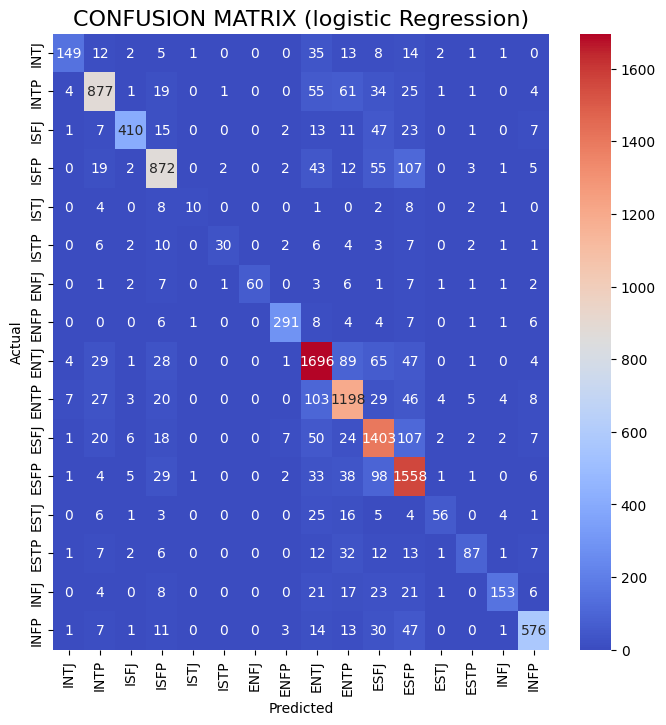

In [23]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm", fmt='d',
            xticklabels=df["type"].unique(),
            yticklabels=df["type"].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX (logistic Regression)", size=16);

In [32]:
# here ya ibrahim you can link osama's gui with the model's prediction of type given a specific post
text_clf.predict(["enfj since january busy schedule able spend little time love bike use one recreation actual transportation might bike weekend even errand weather nice except right live steep hill never make clinically diagnose adhd read extensively talk mom behavior kid find want take psychologist dad yoga clothe tight black capri pink purple tank tear movie sometimes generally cry hard exception movie version book read like harry potter believe two hour usually unfortunately kind read lot book fiction work night circus erin morgenstern almost dovekeepers alice hoffman also read little ambivalent book make movie many favorite book literary enough movie version would atrocious couple agree finish dark could read point without reply may physically alone someone hear post thread fear may belong curiosity someone desperately want meet need know would tell person would even know ask well never read book see loosely base movie see say think fully convince case greatly appreciate input boxerkitty say enfjs need socialize wide set people time unwind make feel somewhat good one thing would love person choose spend life assume find someone choose spend life similar point make completely agree madrabbit exception pursue answer never find possibly exist go cycle get frustrate give decide stop yeah hear know really complicate wish seem way mind one entirely know bring without use word marriage know sure enfj seem far likely think post advice enfjs difficuies relationship something bug week think would post people seem get think thing way see original post title anything go totally relate almost post similar thread able trust relationship day ago desire control others kind freak feel like control feel situation let explain desire tell someone else others mention feel really guiy spend lot money spa type thing feel like could put somewhere useful especially since make ton sad angry pathetic embarrass love oh definitely definitely stem combination number thing occur life big overall factor form attachment incredibly easy seem really hop since refer break letter long distance relationship seriously even face person tell feel honestly see point say letter like change imagine anyone say vote intp close e ok thing sort issue test take quiz get entertainer one think really type reason describe two yeah definitely get jealous come romantic relationship honest many serious romantic relationship part reason though certainly wait leafstone third volume q book originally split japanese another language spend entire week beach book finish finish since long since personalitycafe ahough seem change one bite must say good back somewhere like usually turn doctor overwhelm world around one dream chase large shadowy creature someone else fe save else dream end reach safety happen well avatar doctor clockwork creature always like monster worker try job kind st thank reply appreciate help get nd think everyone right opinion however many people abuse right yea iron man thing xd thank advice everyone thank think need humour might show maybe know win anything harsh like throw beat ahough place go really really know judge personality type say mum introvert dad extroverted ok understand want"])

array(['INFP'], dtype=object)